<a href="https://colab.research.google.com/github/ymuto0302/RW2025/blob/main/classifier_comparison_with_ROCcurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

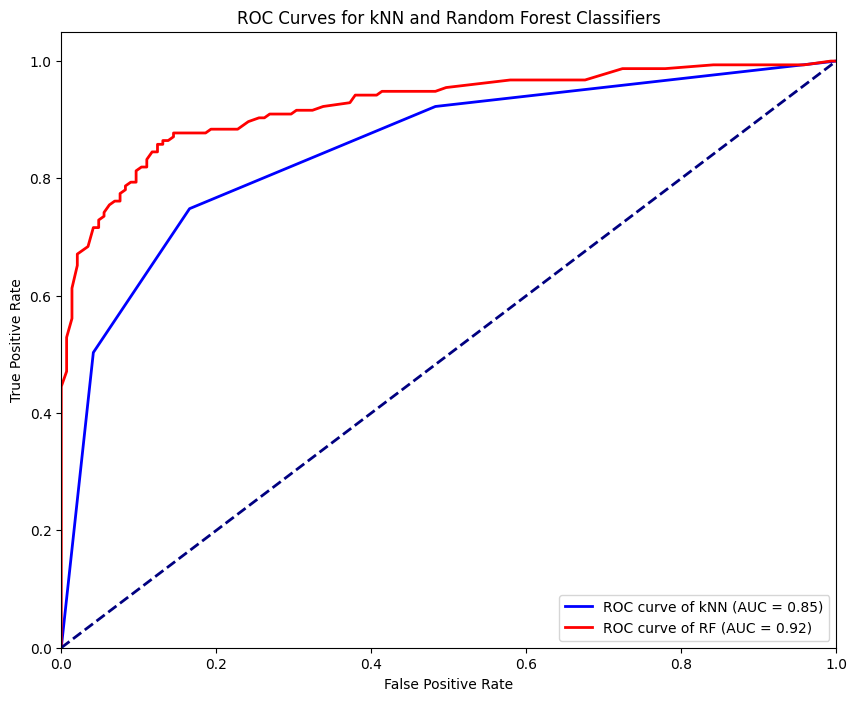

AUC for kNN: 0.850
AUC for Random Forest: 0.924


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# 2クラス分類のデータセットを生成
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           random_state=42)

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# モデルの定義
knn = KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# モデルの学習
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 予測確率の取得
y_score_knn = knn.predict_proba(X_test)[:, 1]
y_score_rf = rf.predict_proba(X_test)[:, 1]

# ROC曲線の計算
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)

# AUCの計算
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ROC曲線のプロット
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC curve of kNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'ROC curve of RF (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for kNN and Random Forest Classifiers')
plt.legend(loc="lower right")
plt.show()

# AUCの表示
print(f"AUC for kNN: {roc_auc_knn:.3f}")
print(f"AUC for Random Forest: {roc_auc_rf:.3f}")
